<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP_4980_W2022_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from google.colab import files
import io

from sklearn.metrics import r2_score

In [ ]:
file = files.upload()

Saving ANSUR_II_FEMALE_Public.csv to ANSUR_II_FEMALE_Public.csv


In [ ]:
df = pd.read_csv(io.StringIO(file['ANSUR_II_FEMALE_Public.csv'].decode('latin-1')))
df.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,22306.606244,229.651057,1335.095166,311.198389,215.739678,1239.029708,228.110272,182.05136,365.348943,305.578550,273.299597,450.324270,67.047835,311.012588,287.978852,133.765358,1021.247734,232.926989,833.742195,590.594663,485.120342,373.257805,1395.667170,269.329809,946.858006,247.40433,1171.636455,782.317221,620.840383,341.858006,33.220040,59.360524,20.391239,232.421954,747.686808,92.711984,246.293051,317.711984,264.081571,494.828298,...,62.748238,400.708459,113.094663,329.795569,371.162135,1309.736153,108.697382,388.199899,241.330312,1028.185297,334.297583,135.405337,856.625881,806.685297,543.552367,1660.286506,1628.473313,1329.688822,1056.256798,616.148540,167.86002,744.005035,437.767875,126.475327,845.350957,1559.409366,425.40282,299.894260,860.905337,213.030715,355.136455,980.149043,677.582075,154.792548,794.190332,35.072004,1.781470,28.943605,64.601712,147.505035
std,20904.730297,31.464691,58.079885,17.164691,14.891757,55.801958,11.771007,9.64192,18.298851,30.757033,22.260454,28.687416,3.485736,14.161655,15.299283,5.563313,75.894711,24.328445,45.730048,32.601670,28.721965,28.515178,59.523731,18.582988,82.699115,27.33815,55.499833,44.636738,42.429390,28.618167,2.770012,3.880447,2.655825,26.250090,30.382044,4.779851,12.435535,18.024909,18.517835,41.012626,...,5.108403,35.163828,6.085959,19.221144,19.658441,62.408130,5.940474,23.586890,15.242710,52.918338,17.251016,10.274340,33.054242,37.912403,29.444676,82.972248,64.199512,57.176027,50.012729,55.810299,14.05848,42.752041,25.043901,6.549916,44.676268,75.985542,26.38895,32.959114,99.931771,31.373874,23.945046,50.022715,109.846458,7.827695,38.194755,95

**Heightin**: self-reported height

**stature**: measured height

They are closely correlated but they aren't the same!

In [ ]:
X = df['Weightlbs'].values #self-reported weight in pounds
y = df['stature'].values #measured height in mm

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression 


clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test,y_pred))

0.2701735740750544


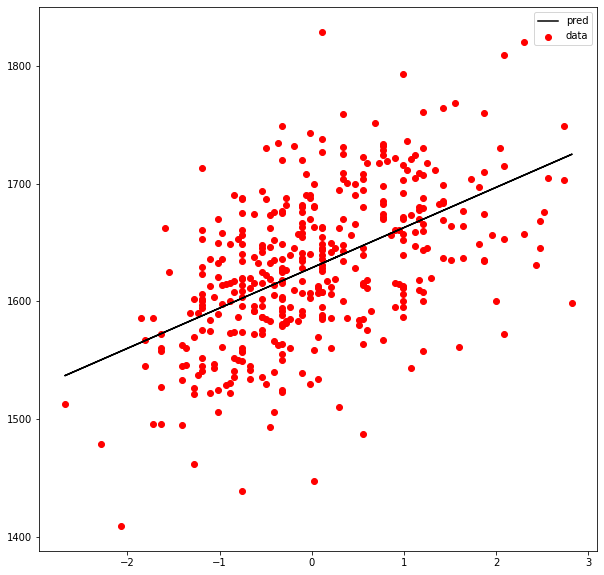

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_test,y_test,color='red',label='data')
plt.plot(X_test,y_pred,color='black',label = 'pred')
plt.legend()
plt.show()

In [ ]:
n = len(X_train)
alpha = 0.01 # learning rate 0.03, 0.1, 0.3 // 0.003, 0.001

m = 0
b = 0

epochs = 500
msqs = np.zeros(epochs)

ms = np.zeros(epochs//10)
bs = np.zeros(epochs//10)

for i in range(epochs):
  y = m * X_train + b
  error = y - y_train

  mean_sq_er = np.sum(error**2) / n

  msqs[i] = mean_sq_er

  b = b - alpha * 2 * np.sum(error) / n
  m = m - alpha * 2 * np.sum(error * X_train) / n

  if(i % 10 == 0):
    ms[i//10] = m
    bs[i//10] = b

  if(i % 50 == 0):
    print(mean_sq_er)

2656010.5277078087
354774.77174305497
49585.90777788298
9111.896174797537
3744.250730717283
3032.39597572286
2937.9901142539375
2925.4700508320643
2923.8096455812815
2923.5894433743183


In [ ]:
# least squares
n = len(X_train)

Ex = np.sum(X_train)
Ey = np.sum(y_train)
Exy = np.sum(np.multiply(X_train,y_train))
Ex2 = np.sum(np.multiply(X_train,X_train))

m = (n*Exy - Ex*Ey) / (n*Ex2 - Ex**2)
b = (Ey - m*Ex)/n

print(m)
print(b)

34.19162823144191
1628.4710327455919


R2 Score: 0.2701735740750544
m:  34.19162823144191 , b:  1628.4710327455919


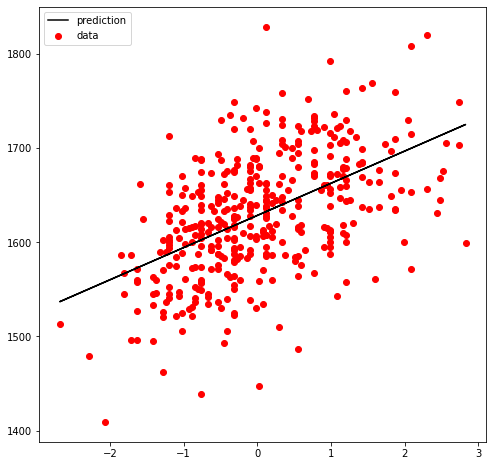

In [ ]:
y_prediction = m * X_test + b
print('R2 Score:', r2_score(y_test, y_prediction))
print('m: ', m, ", b: ", b)

plt.figure(figsize=(8,8))
plt.scatter(X_test, y_test, color='red', label='data')
plt.plot(X_test,y_prediction, color='black', label = 'prediction')
plt.legend()
plt.show()

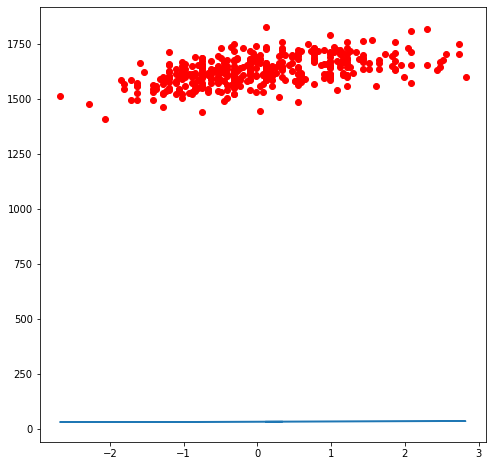

In [ ]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

y_prediction = ms[0] * X_test + bs[0]

fig = plt.figure(figsize=(8,8))
ax = plt.axes()

line, = ax.plot(X_test,y_prediction)#, color='black', label = 'prediction')
ax.scatter(X_test, y_test, color='red', label='data')
  
def animate(i):
  newY = ms[i] * X_test + bs[i]
  line.set_ydata(newY)
  return line,

ani = animation.FuncAnimation(fig, animate, interval = 100, save_count=50,
                              blit = True)

#plt.legend()
#plt.show()

In [ ]:
ani

In [ ]:
print("m: ", m)
print("b: ", b)

This plot shows the reduction in error with each iteration of the gradient descent algorithm.

In [ ]:
plt.figure()
plt.plot(range(epochs),msqs)
plt.show()